In [ ]:
#open on google colab and upload CSVs


#importing dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
#importing medical_df
medical_df = pd.read_csv("/content/medical_df.csv")

In [ ]:
diabetes_df = medical_df[['Diabetes','Total Income per Individual',
'Lacking Health Insurance','Binge Drinking','High Blood Pressure',
'Routine Health Checkups','Currently Smoking', 'Dentist Visits',
'Depression', 'High Cholesterol', 'No Leisure-Time Physical Activity',
"Less than 7 Hours of Sleep" ]]

diabetes_df

,Diabetes,Total Income per Individual,Lacking Health Insurance,Binge Drinking,High Blood Pressure,Routine Health Checkups,Currently Smoking,Dentist Visits,Depression,High Cholesterol,No Leisure-Time Physical Activity,Less than 7 Hours of Sleep
0,13.0,4.121429,24.8,18.4,44.0,73.2,33.0,36.1,16.9,28.8,35.5,41.0
1,3.6,5.682143,14.4,20.6,16.8,71.8,14.4,59.3,26.3,16.0,21.3,37.4
2,18.3,8.220513,20.3,17.0,36.3,69.9,43.8,42.6,20.0,31.1,37.9,35.4
3,9.8,8.305128,20.5,20.5,35.3,69.2,29.2,41.2,20.7,27.7,30.6,43.2
4,9.5,8.596297,11.8,21.5,30.3,65.5,22.4,57.3,24.7,33.1,27.0,32.7
...,...,...,...,...,...,...,...,...,...,...,...,...
26679,7.1,751.694498,3.4,15.2,28.3,67.6,6.2,80.7,21.3,37.5,11.3,22.9
26680,6.8,855.545425,7.7,20.2,25.5,67.1,11.2,78.5,17.9,31.6,14.8,26.0
26681,7.5,1035.795390,3.3,14.6,25.4,61.2,5.4,75.6,15.1,34.8,11.5,24.0
26682,8.7,1197.884536,3.0,14.1,29.9,69.0,5.8,79.4,14.6,38.0,12.6,24.7


## Splitting Data into training sets

In [ ]:
train_dataset = diabetes_df.sample(frac=0.8, random_state=1)
test_dataset = diabetes_df.drop(train_dataset.index)

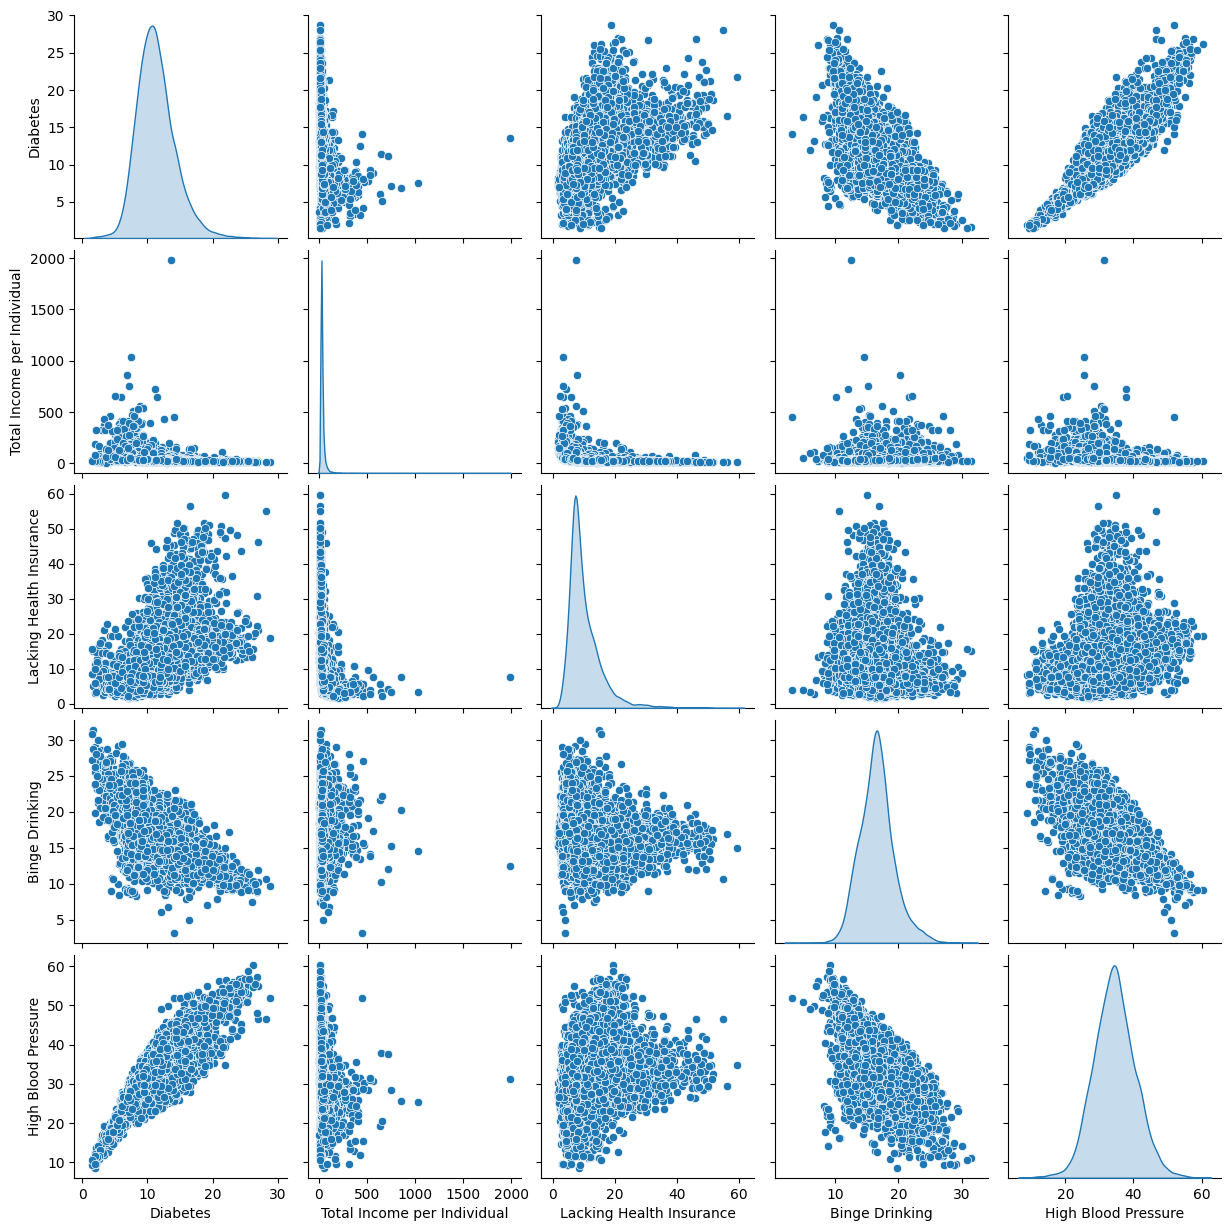

In [ ]:
#Inspecting data

sns.pairplot(train_dataset[['Diabetes','Total Income per Individual',
'Lacking Health Insurance','Binge Drinking','High Blood Pressure']], diag_kind='kde')

In [ ]:
#Checking overall statistics. Each feature covers a very different range
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes,21347.0,11.295924,2.952410,1.500000,9.300000,11.00000,12.900000,28.700000
Total Income per Individual,21347.0,38.448158,33.853274,4.121429,25.893261,31.47457,40.249517,1980.466887
Lacking Health Insurance,21347.0,10.224669,5.600154,1.700000,6.800000,8.60000,12.200000,59.600000
Binge Drinking,21347.0,16.593554,2.720517,3.200000,14.800000,16.50000,18.100000,31.400000
High Blood Pressure,21347.0,34.377290,6.158767,8.600000,30.300000,34.30000,38.300000,60.400000
Routine Health Checkups,21347.0,73.896065,5.004122,49.100000,71.700000,75.00000,77.200000,93.000000
Currently Smoking,21347.0,17.893653,4.887682,2.800000,14.700000,17.80000,21.000000,46.300000
Dentist Visits,21347.0,62.195067,8.652366,27.100000,56.400000,63.10000,68.300000,84.000000
Depression,21347.0,22.546288,3.467845,8.300000,20.400000,22.60000,24.800000,37.700000
High Cholesterol,21347.0,36.000506,3.874429,12.400000,33.700000,36.10000,38.500000,54.700000


## Splitting features from labels

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Diabetes')
test_labels = test_features.pop('Diabetes')

In [ ]:
#Normalization of Data
train_dataset.describe().transpose()[["mean","std"]]

,mean,std
Diabetes,11.295924,2.952410
Total Income per Individual,38.448158,33.853274
Lacking Health Insurance,10.224669,5.600154
Binge Drinking,16.593554,2.720517
High Blood Pressure,34.377290,6.158767
Routine Health Checkups,73.896065,5.004122
Currently Smoking,17.893653,4.887682
Dentist Visits,62.195067,8.652366
Depression,22.546288,3.467845
High Cholesterol,36.000506,3.874429


In [ ]:
#Data Normalization. We want to normalize because the features are multiplied by the model weights.
#So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs. Makes overall model more stable
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
#Fitting state of preprocessing layer to the data by calling Normalization.adapt
normalizer.adapt(np.array(train_features))

In [ ]:
#Calculating the mean and varience and store them in a layer, when layer is called, it returns the input data, with each feature indepen normalized
print(normalizer.mean.numpy())

[[38.44816  10.224663 16.59355  34.37731  73.89606  17.893644 62.19505
  22.546272 36.000507 25.993984 33.467506]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress = True):
    print('First example:', first)
    print()
    print('Normalized: ' , normalizer(first).numpy())

First example: [[52.83  4.9  17.6  31.   74.   11.8  75.   21.5  34.3  17.5  29.5 ]]

Normalized:  [[ 0.42 -0.95  0.37 -0.55  0.02 -1.25  1.48 -0.3  -0.44 -1.34 -1.  ]]


## Linear Regression

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
total_income_per_individual_lr = np.array(train_features['Total Income per Individual'])

total_income_per_individual_lr_normalizer = layers.Normalization(input_shape=[1,], axis=None)
total_income_per_individual_lr_normalizer.adapt(total_income_per_individual_lr )

In [ ]:
#Build the Keras Sequential model, model will predict cancer rate from total income per individual

total_income_per_individual_lr_model = tf.keras.Sequential([
    total_income_per_individual_lr_normalizer,
    layers.Dense(units=1)
])
total_income_per_individual_lr_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
total_income_per_individual_lr_model.predict(total_income_per_individual_lr[:10])

1/1 [==============================] - 0s 101ms/step


array([[ 0.02204635],
       [ 0.01260378],
       [-0.00773726],
       [-0.01456386],
       [ 0.02901059],
       [-0.02169393],
       [-0.01386415],
       [-0.01030297],
       [ 0.00490733],
       [-0.01155108]], dtype=float32)

In [ ]:
#Compiling loss and optimizer
total_income_per_individual_lr_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [ ]:
#Fittiing model
history = total_income_per_individual_lr_model.fit(
    train_features['Total Income per Individual'],
    train_labels,
    epochs=100,
    verbose=0,
    #Calculating vallidation results on 20% of the training data
    validation_split = 0.2)


In [ ]:
#Visualizing history
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,1.969934,2.032648,95
96,1.972466,2.018983,96
97,1.975541,2.015564,97
98,1.972062,2.033297,98
99,1.972500,2.036461,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Diabetes]')
  plt.legend()
  plt.grid(True)

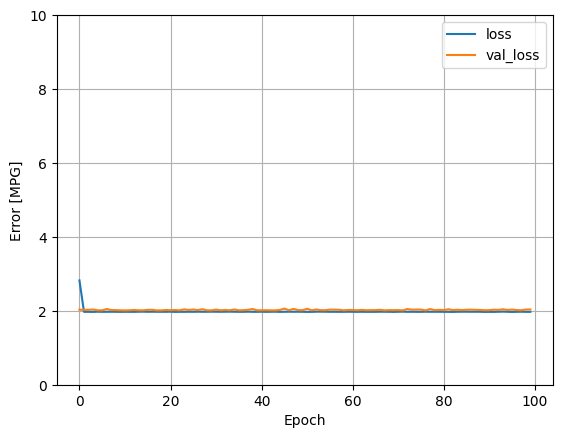

In [ ]:
plot_loss(history)

In [ ]:
#Collecting results to save for later
test_results = {}

test_results['total_income_per_individual_lr_model'] = total_income_per_individual_lr_model.evaluate(
    test_features["Total Income per Individual"],
    test_labels, verbose=0
)

In [ ]:
x = tf.linspace(0.0,250,251)
y = total_income_per_individual_lr_model.predict(x)

8/8 [==============================] - 0s 2ms/step


In [ ]:
def plot_total_income_per_individual_lr(x,y):
    plt.scatter(train_features['Total Income per Individual'], train_labels,label='Data')
    plt.plot(x,y,color='k',label='Predictions')
    plt.xlabel('Total Income Per Individual')
    plt.ylabel(('Diabetes'))

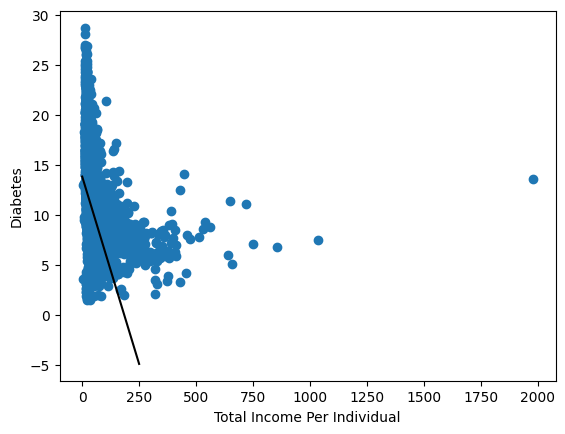

In [ ]:
plot_total_income_per_individual_lr (x,y)

## Linear Regression with multiple inputs

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
# When Model.predict is call on batch of inputs, it produces units=1 outputs for each example
linear_model.predict(train_features)[:10]

668/668 [==============================] - 1s 2ms/step


array([[-1.174024  ],
       [-0.9519043 ],
       [-1.060248  ],
       [ 1.0789891 ],
       [-2.4633162 ],
       [ 0.49596637],
       [ 0.5705521 ],
       [ 0.72254366],
       [-0.08692269],
       [-1.0867968 ]], dtype=float32)

In [ ]:
#When model is called, its weighted matrices will be built-check that the kernal weights(the m in y = mx + b) have a shape of (9,1)
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-5.1744580e-03],
       [-7.9998434e-02],
       [-2.2569048e-01],
       [ 1.0560513e-02],
       [ 3.9279461e-04],
       [ 2.5748670e-01],
       [-2.0152044e-01],
       [ 6.8347877e-01],
       [ 4.1647595e-01],
       [ 1.3422221e-01],
       [-2.9303849e-02]], dtype=float32)>

In [ ]:
#Configuring moel with Keras Model.compile and train with Model.fit for 100 epochs
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

## Regression with a deep neural network (DNN)


In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

## Regression using a DNN and multiple inputs

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 11)                23        
 on)                                                             
                                                                 
 dense_2 (Dense)             (None, 64)                768       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5016 (19.60 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 23 (96.00 Byte)
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)


CPU times: user 2min 2s, sys: 5.86 s, total: 2min 7s
Wall time: 2min 22s


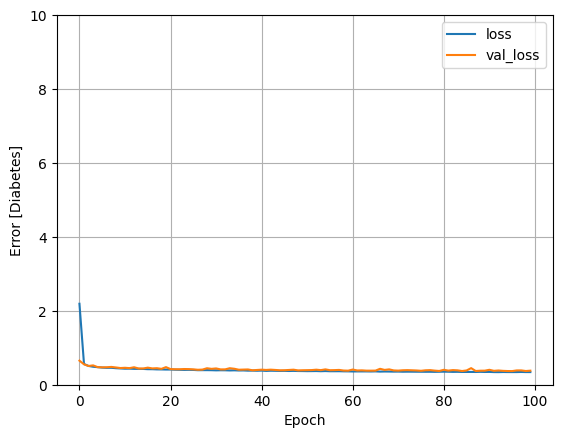

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}


test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)


In [ ]:

pd.DataFrame(test_results, index=['Mean absolute error [Cancer Risk]']).T


,Mean absolute error [Cancer Risk]
total_income_per_individual_lr_model,2.020748
linear_model,11.303056
dnn_model,0.372963


167/167 [==============================] - 0s 2ms/step


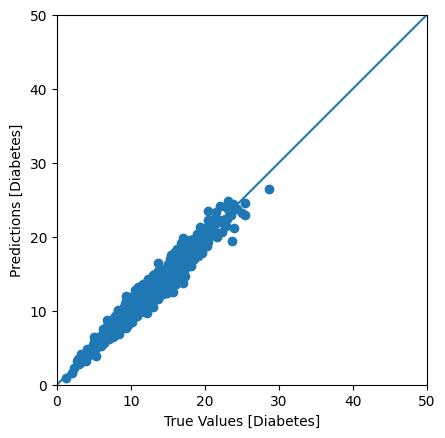

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Diabetes]')
plt.ylabel('Predictions [Diabetes]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Text(0, 0.5, 'Count')

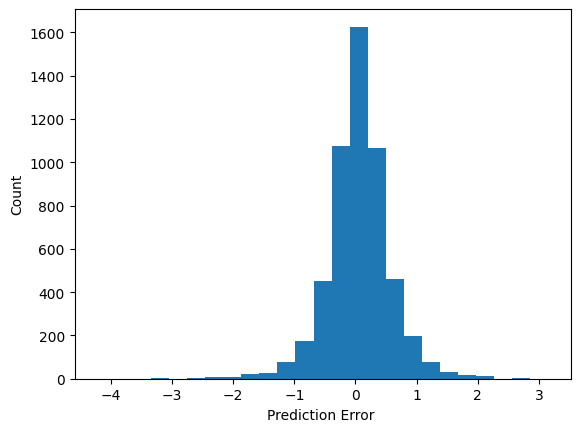

In [ ]:
#Error Distribution
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error ')
plt.ylabel('Count')



In [ ]:
dnn_model.save('dnn_model')


In [ ]:
test_predictions

array([20.374517 , 20.93126  , 11.452274 , ...,  7.636659 ,  7.5801554,
        7.9986906], dtype=float32)

In [ ]:
test_labels

14       18.9
15       21.0
18       12.2
20       24.3
27       11.1
         ... 
26665     8.5
26668     6.8
26669     8.7
26674     7.1
26682     8.7
Name: Diabetes, Length: 5337, dtype: float64

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error ']).T

,Mean absolute error
total_income_per_individual_lr_model,2.020748
linear_model,11.303056
dnn_model,0.372963
reloaded,0.372963
